In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_reviews = pd.read_csv('../data/reviews.csv')
df_submissions = pd.read_csv('../data/Submissions.csv')
df_dec = pd.read_csv('../data/decision.csv')
df_keyword = pd.read_csv('../data/submission_keyword.csv')

In [3]:
df_submissions.head()

,id,original,tcdate,tmdate,number,title,authorids,authors,keywords,abstract,pdf,conf_name,conf_year,tldr
0,r28GdiQF7vM,YaMZTQ7VXt2,1.601310e+12,1.635170e+12,546,Sharper Generalization Bounds for Learning wit...,"[""~Yunwen_Lei1"", ""~Yiming_Ying1""]","[""Yunwen Lei"", ""Yiming Ying""]","[""generalization bounds"", ""non-convex learning""]",Stochastic optimization has become the workhor...,/pdf/43ac8e3a506c7ad54162957c4698675f659e050a.pdf,ICLR,2021,We develop sharper generalization bounds for l...
1,o29tNZZqGcN,w4nLEWLcq9ZN,1.601310e+12,1.633020e+12,1000,Bridging Graph Network to Lifelong Learning wi...,"[""~Chen_Wang2"", ""~Yuheng_Qiu1"", ""~Sebastian_Sc...","[""Chen Wang"", ""Yuheng Qiu"", ""Sebastian Scherer""]","[""Graph Neural Network"", ""Continual Learning""]",Graph neural networks (GNN) are powerful model...,/pdf/dd7ff523aa1bd5d49e10f887e350de2ee909023a.pdf,ICLR,2021,We propose a graph topology to overcome the d...
2,Wj4ODo0uyCF,EGD9_RwnpMs,1.601310e+12,1.632760e+12,3265,Share or Not? Learning to Schedule Language-Sp...,"[""~Biao_Zhang2"", ""~Ankur_Bapna1"", ""~Rico_Sennr...","[""Biao Zhang"", ""Ankur Bapna"", ""Rico Sennrich"",...","[""language-specific modeling"", ""conditional co...",Using a mix of shared and language-specific (L...,/pdf/daf5088c43f0425f9ab145f2bb0b1db43092147f.pdf,ICLR,2021,We investigate and improve parameter-sharing s...
3,_qJXkf347k,7LgLMxopN9,1.601310e+12,1.632380e+12,1892,Reinforcement Learning Based Asymmetrical DNN ...,"[""~Brijraj_Singh1"", ""ya.jain@samsung.com"", ""~M...","[""Brijraj Singh"", ""Yash Jain"", ""Mayukh Das"", ""...","[""DNN Compression"", ""Loading time""]",Latency of DNN (Deep Neural Network) based pre...,https://openreview.net/references/pdf?id=x1Fun...,ICLR,2021,This work proposes an application of reinforce...
4,LGgdb4TS4Z,c4RxVOgHI1,1.601310e+12,1.632240e+12,2141,Topology-Aware Segmentation Using Discrete Mor...,"[""~Xiaoling_Hu1"", ""~Yusu_Wang1"", ""~Li_Fuxin1"",...","[""Xiaoling Hu"", ""Yusu Wang"", ""Li Fuxin"", ""Dimi...","[""Topology"", ""Morse theory"", ""Image segmentati...",In the segmentation of fine-scale structures f...,/pdf/e328a81d734d6f9eb2808b309985c8aeffb1b27b.pdf,ICLR,2021,This paper proposes a loss based on discrete M...


In [ ]:
df_submissions.head()

In [4]:
df_reviews.head()

,id,number,forum,replyto,title,review,rating_int,confidence_int,conf_name
0,kOJs5_dKXyW,4,tGZu6DlbreV,tGZu6DlbreV,"Review of ""RNNLogic: Learning Logic Rules for ...",There is a lot of recent work on link-predicti...,6,4.0,ICLR2021
1,kbedPNPDFwa,1,uKhGRvM8QNH,uKhGRvM8QNH,This paper proposes two knowledge distillation...,Pros:\n\n- The different attention techniques ...,6,4.0,ICLR2021
2,zgzRcwaItum,2,IrM64DGB21,IrM64DGB21,Needs to rephrase claims and design experiment...,Overview of the paper: \nThis paper studies th...,5,4.0,ICLR2021
3,ZJ_1Qi4LbUb,2,ww-7bdU6GA9,ww-7bdU6GA9,Paper that has good contributions for analyzin...,## Summary\nThe authors propose a near minimax...,6,3.0,ICLR2021
4,Bbp-JccEu-,3,j0uePNuoBho,j0uePNuoBho,Review of the paper Learned Threshold Pruning,The paper proposed a new method to prune a neu...,6,4.0,ICLR2021


In [5]:
df_reviews['review'][1]

'Pros:\n\n- The different attention techniques seem to consistently improve object detectors across different models. \n- The ablation studies are important in showing the advantage and impact of each proposed module. \n- Please clarify if the student models start from random weights or are initialized after the teacher training. In this regard to what extend is the approach is transferable to students with random weights?\n\nCons:\n\n- The authors only show results when training a network of the same structure with the added modules, in an attempt to boost accuracy. However, an important use of knowledge of knowledge distillation is to train smaller models, and such results are missing from the paper. Overall, the results in the paper somewhat justify the "accurate" part of the title but not the "efficient".\n\n- The importance of high AP is a bit overstated. It is important to demonstrate the different behavior between classification and detection networks, however, the same improvem

In [6]:
df_keyword.head()

,submission_id,primary_keyword,secondary_keyword
0,--gvHfE3Xf5,reinforcement learning,meta-learning
1,--rcOeCKRh,transfer learning,object detection
2,-0LuSWi6j4,variational autoencoder,deep generative models
3,-29uFS4FiDZ,word embeddings,other
4,-2FCwDKRREu,representation learning,other


In [7]:
#get the average review score
df_average_review_score = df_reviews.groupby('forum')['rating_int'].mean().reset_index()
df_average_review_score

,forum,rating_int
0,#NAME?,5.479730
1,-2FCwDKRREu,7.666667
2,-5VpoDCExrU,4.750000
3,-5W5OBfFlwX,4.000000
4,-6vS_4Kfz0,6.250000
...,...,...
7587,zsKWh2pRSBK,4.750000
7588,zspml_qcldq,4.000000
7589,ztMLindFLWR,5.800000
7590,zv-typ1gPxA,7.000000


# Looking at Review Length and Score & Decision

In [8]:
#Step 1 - Combine Review DF and Decision DF

df_rev_dec = pd.merge(df_reviews, df_dec, left_on='forum', right_on='forum', how = 'inner')[['review','decision','conf_name_y','rating_int','forum']]

df_rev_dec.head()

,review,decision,conf_name_y,rating_int,forum
0,There is a lot of recent work on link-predicti...,Accept (Poster),ICLR2021,6,tGZu6DlbreV
1,"In this paper, the author proposes RNNLogic fo...",Accept (Poster),ICLR2021,7,tGZu6DlbreV
2,This paper focuses on learning logic rules via...,Accept (Poster),ICLR2021,6,tGZu6DlbreV
3,"In this work, the authors illustrate an approa...",Accept (Poster),ICLR2021,8,tGZu6DlbreV
4,Pros:\n\n- The different attention techniques ...,Accept (Poster),ICLR2021,6,uKhGRvM8QNH


## Text Cleaning or Word Normalization

In [9]:
#case folding

df_rev_dec['review'] = df_rev_dec['review'].str.lower()

In [10]:
df_rev_dec

,review,decision,conf_name_y,rating_int,forum
0,there is a lot of recent work on link-predicti...,Accept (Poster),ICLR2021,6,tGZu6DlbreV
1,"in this paper, the author proposes rnnlogic fo...",Accept (Poster),ICLR2021,7,tGZu6DlbreV
2,this paper focuses on learning logic rules via...,Accept (Poster),ICLR2021,6,tGZu6DlbreV
3,"in this work, the authors illustrate an approa...",Accept (Poster),ICLR2021,8,tGZu6DlbreV
4,pros:\n\n- the different attention techniques ...,Accept (Poster),ICLR2021,6,uKhGRvM8QNH
...,...,...,...,...,...
25163,the author proposes the use of low-rank matrix...,Reject,ICLR2017,4,rkaRFYcgl
25164,the paper proposes a low-rank version of pass-...,Reject,ICLR2017,5,rkaRFYcgl
25165,the authors study the use of low-rank approxim...,Reject,ICLR2017,6,rkaRFYcgl
25166,​there have been numerous works ​on learning f...,Reject,ICLR2017,6,BkUDvt5gg


In [11]:
df_rev_dec['decision'].unique()

array(['Accept (Poster)', 'Reject', 'Accept (Spotlight)', 'Accept (Oral)',
       'Accept (Talk)', 'Invite to Workshop Track'], dtype=object)

In [12]:
#clean up decision text

def clean_up_decision(text):
    if text in ['Accept (Poster)','Accept (Spotlight)', 'Accept (Oral)','Accept (Talk)']:
        return 'Accept'
    else:
        return text

    
df_rev_dec['decision_clean'] = df_rev_dec['decision'].apply(clean_up_decision) 

In [14]:
df_rev_dec['decision_clean']

array(['Accept', 'Reject', 'Invite to Workshop Track'], dtype=object)

## Number of Sentences Per Review

In [15]:
df_reviews['review'][1]

'Pros:\n\n- The different attention techniques seem to consistently improve object detectors across different models. \n- The ablation studies are important in showing the advantage and impact of each proposed module. \n- Please clarify if the student models start from random weights or are initialized after the teacher training. In this regard to what extend is the approach is transferable to students with random weights?\n\nCons:\n\n- The authors only show results when training a network of the same structure with the added modules, in an attempt to boost accuracy. However, an important use of knowledge of knowledge distillation is to train smaller models, and such results are missing from the paper. Overall, the results in the paper somewhat justify the "accurate" part of the title but not the "efficient".\n\n- The importance of high AP is a bit overstated. It is important to demonstrate the different behavior between classification and detection networks, however, the same improvem

In [16]:
sent_tokenize(df_reviews['review'][1])

['Pros:\n\n- The different attention techniques seem to consistently improve object detectors across different models.',
 '- The ablation studies are important in showing the advantage and impact of each proposed module.',
 '- Please clarify if the student models start from random weights or are initialized after the teacher training.',
 'In this regard to what extend is the approach is transferable to students with random weights?',
 'Cons:\n\n- The authors only show results when training a network of the same structure with the added modules, in an attempt to boost accuracy.',
 'However, an important use of knowledge of knowledge distillation is to train smaller models, and such results are missing from the paper.',
 'Overall, the results in the paper somewhat justify the "accurate" part of the title but not the "efficient".',
 '- The importance of high AP is a bit overstated.',
 'It is important to demonstrate the different behavior between classification and detection networks, how

In [17]:
len(sent_tokenize(df_reviews['review'][1]))

18

In [18]:
def sentence_count(text):
    return len(sent_tokenize(text))


df_rev_dec['sent_count'] = df_rev_dec['review'].apply(sentence_count)

In [19]:
df_rev_dec.head()

,review,decision,conf_name_y,rating_int,forum,decision_clean,sent_count
0,there is a lot of recent work on link-predicti...,Accept (Poster),ICLR2021,6,tGZu6DlbreV,Accept,74
1,"in this paper, the author proposes rnnlogic fo...",Accept (Poster),ICLR2021,7,tGZu6DlbreV,Accept,36
2,this paper focuses on learning logic rules via...,Accept (Poster),ICLR2021,6,tGZu6DlbreV,Accept,10
3,"in this work, the authors illustrate an approa...",Accept (Poster),ICLR2021,8,tGZu6DlbreV,Accept,7
4,pros:\n\n- the different attention techniques ...,Accept (Poster),ICLR2021,6,uKhGRvM8QNH,Accept,18


/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

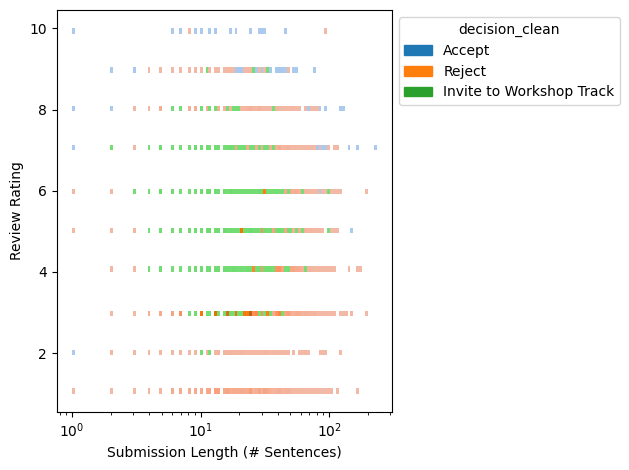

In [20]:
ax = sns.histplot(data=df_rev_dec, x='sent_count',
                  y='rating_int',
                  hue='decision_clean',
                kde=True, 
                  log_scale=(True,False),
                 legend=True)

# Set axis labels
ax.set(xlabel='Submission Length (# Sentences)', ylabel='Review Rating')

# Move the legend outside the plot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

## Number of Tokens Per Review

- Text Preprocessing: It converts raw text data into a structured format that can be easily processed by NLP algorithms and models.


- Feature Extraction: Tokens serve as features or inputs for various NLP tasks, such as text classification, sentiment analysis, and machine translation.


- Handling Out-of-Vocabulary (OOV) Words: Certain tokenization techniques, like subword tokenization, can handle previously unseen or rare words by breaking them down into smaller, meaningful units.


- Language Understanding: Tokenization helps NLP models understand the structure and meaning of text by separating it into meaningful units.

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
# Removing punctuation
df_rev_dec['clean_review_word'] = df_rev_dec['review'].str.translate(str.maketrans('', '', string.punctuation))

df_rev_dec['clean_review_word']

0        there is a lot of recent work on linkpredictio...
1        in this paper the author proposes rnnlogic for...
2        this paper focuses on learning logic rules via...
3        in this work the authors illustrate an approac...
4        pros\n\n the different attention techniques se...
                               ...                        
25163    the author proposes the use of lowrank matrix ...
25164    the paper proposes a lowrank version of passth...
25165    the authors study the use of lowrank approxima...
25166    ​there have been numerous works ​on learning f...
25167    this submission proposes a letterlevel decoder...
Name: clean_review_word, Length: 25168, dtype: object

In [23]:
word_tokenize(df_rev_dec['clean_review_word'][0])

['there',
 'is',
 'a',
 'lot',
 'of',
 'recent',
 'work',
 'on',
 'linkprediction',
 'in',
 'knowledge',
 'graphs',
 'one',
 'approach',
 'is',
 'based',
 'on',
 'embedding',
 'entities',
 'and',
 'relations',
 'in',
 'a',
 'knowledge',
 'graph',
 'into',
 'vector',
 'spaces',
 'and',
 'the',
 'other',
 'is',
 'based',
 'on',
 'finding',
 'rules',
 'that',
 'imply',
 'relations',
 'and',
 'then',
 'using',
 'these',
 'rules',
 'to',
 'find',
 'new',
 'links',
 'or',
 'facts',
 'this',
 'paper',
 'takes',
 'the',
 'latter',
 'approach',
 'within',
 'the',
 'area',
 'of',
 'rulebased',
 'methods',
 'a',
 'number',
 'of',
 'recent',
 'papers',
 'have',
 'used',
 'neural',
 'network',
 'methods',
 'to',
 'simultaneously',
 'generate',
 'rules',
 'and',
 'to',
 'find',
 'ruleweights',
 'or',
 'other',
 'related',
 'parameters',
 'indicating',
 'how',
 'important',
 'individual',
 'rules',
 'are',
 'simultaneously',
 'solving',
 'for',
 'rules',
 'and',
 'ruleweights',
 'is',
 'a',
 'difficu

In [24]:
# Tokenizing the text
df_rev_dec['tokens'] = df_rev_dec['clean_review_word'].apply(word_tokenize)

In [25]:
df_rev_dec['tokens'][2]

['this',
 'paper',
 'focuses',
 'on',
 'learning',
 'logic',
 'rules',
 'via',
 'embased',
 'algorithm',
 'the',
 'idea',
 'in',
 'the',
 'paper',
 'is',
 'that',
 'estep',
 'would',
 'try',
 'to',
 'generate',
 'rules',
 'while',
 'mstep',
 'would',
 'update',
 'the',
 'parameters',
 'the',
 'empirical',
 'comparisons',
 'are',
 'interesting',
 'and',
 'show',
 'that',
 'the',
 'paper',
 'improves',
 'on',
 'prior',
 'work',
 'there',
 'are',
 'several',
 'aspects',
 'that',
 'make',
 'it',
 'very',
 'hard',
 'for',
 'me',
 'to',
 'understand',
 'the',
 'papers',
 'contributions',
 'and',
 'evaluation',
 'i',
 'am',
 'listing',
 'below',
 'and',
 'hoping',
 'that',
 'other',
 'reviewers',
 'or',
 'authors',
 'would',
 'be',
 'able',
 'to',
 'clarify',
 '1',
 'the',
 'paper',
 'suggests',
 'that',
 'the',
 'performance',
 'is',
 'owing',
 'to',
 'reduction',
 'of',
 'search',
 'space',
 'due',
 'to',
 'em',
 'step',
 'it',
 'is',
 'hard',
 'to',
 'understand',
 'what',
 'mln',
 'tool',

In [26]:
stop_words = set(stopwords.words('english'))

stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [27]:
stop_words = set(stopwords.words('english'))
df_rev_dec['tokens'] = df_rev_dec['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

df_rev_dec['tokens']

0        [lot, recent, work, linkprediction, knowledge,...
1        [paper, author, proposes, rnnlogic, learning, ...
2        [paper, focuses, learning, logic, rules, via, ...
3        [work, authors, illustrate, approach, learning...
4        [pros, different, attention, techniques, seem,...
                               ...                        
25163    [author, proposes, use, lowrank, matrix, feedf...
25164    [paper, proposes, lowrank, version, passthroug...
25165    [authors, study, use, lowrank, approximation, ...
25166    [​there, numerous, works, ​on, learning, raw, ...
25167    [submission, proposes, letterlevel, decoder, v...
Name: tokens, Length: 25168, dtype: object

In [28]:
df_rev_dec['tokens_counts'] = df_rev_dec['tokens'].apply(len)

In [ ]:

# Removing punctuation
df_rev_dec['clean_review_word'] = df_rev_dec['review'].str.translate(str.maketrans('', '', string.punctuation))


# Tokenizing the text
df_rev_dec['tokens'] = df_rev_dec['clean_review_word'].apply(word_tokenize)


# Removing stop words
stop_words = set(stopwords.words('english'))
df_rev_dec['tokens'] = df_rev_dec['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df_rev_dec['tokens_counts'] = df_rev_dec['tokens'].apply(len)

In [29]:
df_rev_dec['tokens_counts']

0        710
1        342
2        116
3         63
4        160
        ... 
25163    187
25164     41
25165     97
25166    157
25167    255
Name: tokens_counts, Length: 25168, dtype: int64

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

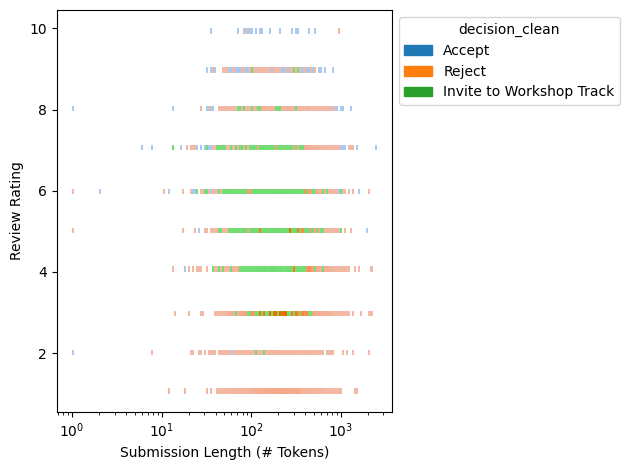

In [30]:
ax = sns.histplot(data=df_rev_dec, x='tokens_counts',
                  y='rating_int',
                  hue='decision_clean',
                kde=True, 
                  log_scale=(True,False),
                 legend=True)

# Set axis labels
ax.set(xlabel='Submission Length (# Tokens)', ylabel='Review Rating')

# Move the legend outside the plot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

## Average Token and Sentence Count

In [31]:
df_rev_dec_ave = df_rev_dec.groupby(['forum','decision_clean'])[['rating_int','tokens_counts','sent_count']].mean().reset_index()

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

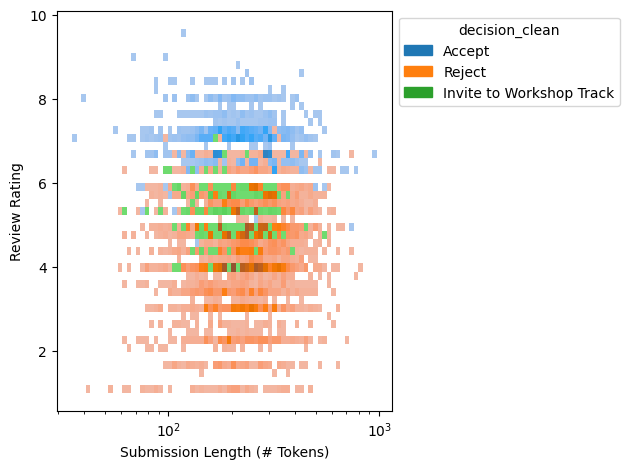

In [32]:
ax = sns.histplot(data=df_rev_dec_ave, x='tokens_counts',
                  y='rating_int',
                  hue='decision_clean',
                kde=True, 
                  log_scale=(True,False),
                 legend=True)

# Set axis labels
ax.set(xlabel='Submission Length (# Tokens)', ylabel='Review Rating')

# Move the legend outside the plot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

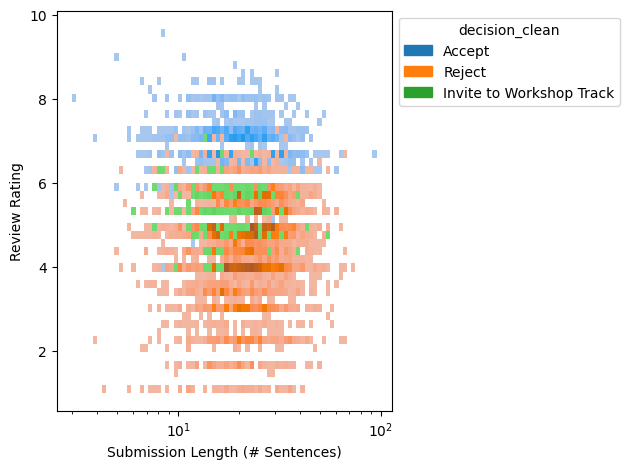

In [33]:
ax = sns.histplot(data=df_rev_dec_ave, x='sent_count',
                  y='rating_int',
                  hue='decision_clean',
                kde=True, 
                  log_scale=(True,False),
                 legend=True)

# Set axis labels
ax.set(xlabel='Submission Length (# Sentences)', ylabel='Review Rating')

# Move the legend outside the plot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

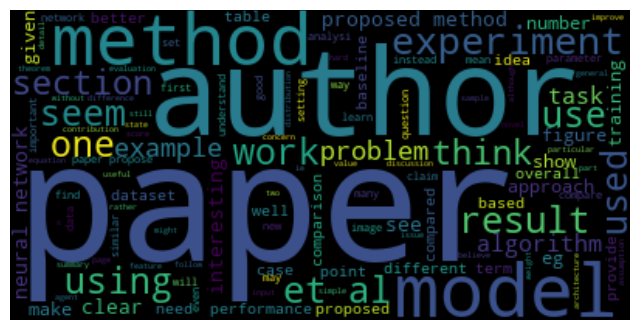

In [34]:
# Concatenate text data
text = ' '.join(df_rev_dec['clean_review_word'])

# Generate word cloud
wordcloud = WordCloud().generate(text)

# Display word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

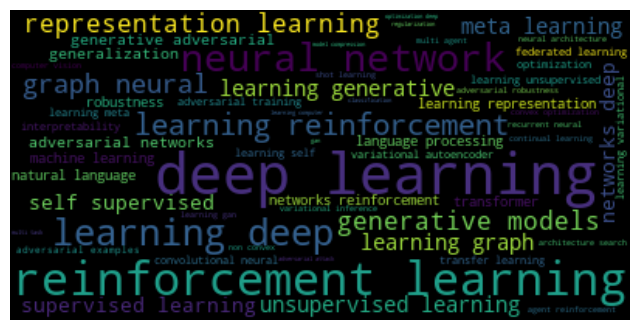

In [35]:
# Concatenate text data
text = ' '.join(df_keyword['primary_keyword'])

# Generate word cloud
wordcloud = WordCloud().generate(text)

# Display word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

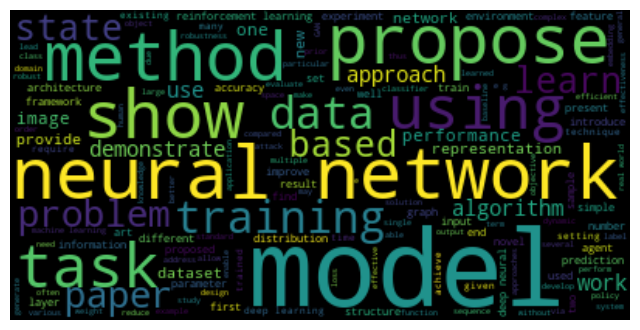

In [36]:
# Concatenate text data
text = ' '.join(df_submissions['abstract'])

# Generate word cloud
wordcloud = WordCloud().generate(text)

# Display word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()